## Preliminary Statistics

First let us import the necessary libraries for our work. We will be using a pandas dataframe object to acccess our data and seaborn to plot the graphs. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from pandas import DataFrame
%matplotlib inline

We first start by loading our data into a dataframe object.

In [2]:
data = pd.read_json("data.json")

Let us see how our data looks like and what are the headers of the dataframe. 

In [3]:
data.head(1)

topic category  \
0  Kirk will always be better than Picard   !!!       TV   

                                       pro_arguments  \
0  [{'title': 'A fact about   Galaxy Quest', 'bod...   

                                       con_arguments  
0  [{'title': 'Buy Adderall Online', 'body': 'Buy...

### A Histogram of Argument Lengths

Now we calculate the number of tokens in all arguments and store it in a list. To do that, first we preprocess our data and replace any character except the alphanumeric ones, with a space. Then we tokenize the pro and con arguments separately and store them in a common tokenized arguments list. Then, we stored the numbers of tokens per argument in another list.

In [4]:
pros=data["pro_arguments"]
cons=data["con_arguments"]
topics=data["topic"]
category=data["category"]
args=[]

for i in range(len(pros)):
    for j in range(len(pros[i])):
        text=re.sub("[^a-zA-Z0-9]", " ", pros[i][j]['body'])        
        args.append(text.split())

for i in range(len(cons)):
    for j in range(len(cons[i])):
        text=re.sub("[^a-zA-Z0-9]", " ", cons[i][j]['body'])
        args.append(text.split())

data_length = []
for i in range(0,len(args)):
    data_length.append(len(args[i]))

Let us check the maximum and minimum length of arguments among all the arguments.

In [5]:
(max(data_length), min(data_length))

(518, 45)

As it can be seen, maximum tokens of an argument is around 520 and the minimum length is 45. So, we have chosen our number of bins in histogram to be 25, which is a divisor of the difference between 520 and 45, i.e. 475.

Now, we proceed with histogram plot of argument length. A histogram shows the distribution of one or more variables by counting the number of observations falling within discrete intervals, commonly called as 'bins'. Here, our data is univariate and our chosen bin count is 25. 

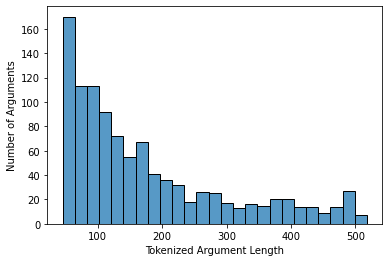

In [6]:
ax = sns.histplot(x=data_length, bins=25)
ax.set(xlabel='Tokenized Argument Length', ylabel='Number of Arguments')
plt.show()

### A Barplot for Number of 'pro/con' Arguments per Topic 

For plotting the pro/con arguments for a topic we first take the list of all the pro and con arguments per topic and convert them into a dataframe. Then we take the count of all the arguments and then sum them up for each individual topic.

In [8]:
pro_list=[]
con_list=[]
args_list=[]
cat_list=[]

for i in range(len(pros.index)):
    df = DataFrame(pros[i])
    df_len = len(df)
    pro_list.append(df_len)
    
for i in range(len(cons.index)):
    df = DataFrame(cons[i])
    df_len = len(df)
    con_list.append(df_len)
    
for j in range(len(pro_list)):
    args_list.append(pro_list[j]+con_list[j])

The following barplot shows the Topics on the x-axis and the number of arguments in each topic on the y-axis.

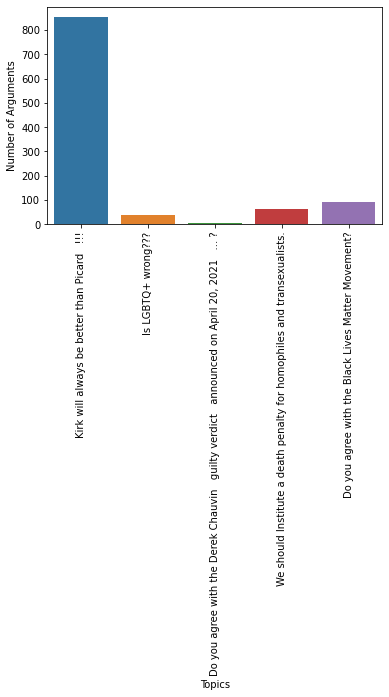

In [9]:
bp = sns.barplot(x=topics, y=args_list)
bp.set(xlabel='Topics',ylabel='Number of Arguments')
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

### A Barplot for Number of 'pro/con' Arguments per Category

To plot the number of pro/con arguments per category we plot the categories we scraped from the data.json file on the x-axis and the number of arguments we derived in args_list on the y-axis. 

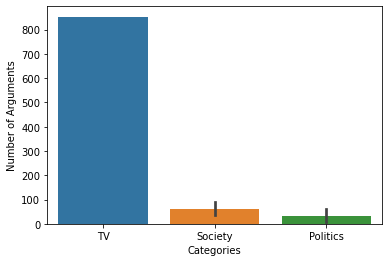

In [10]:
bp = sns.barplot(x=category, y=args_list)
bp.set(xlabel='Categories',ylabel='Number of Arguments')
plt.show()